In [1]:
import os
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as img
import astropy.units as u
from astropy import constants

In [2]:
# Biases
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')
biases = glob.glob('**/bias_0s_*.FIT')
bias_timestream = [fits.getdata(x) for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
mean_bias[308][628] = mean_bias[309][629]
stddev_bias = np.std(bias_timestream, axis=0)
readnoise = np.mean(stddev_bias)
mean_bias_noise = readnoise / np.sqrt(len(biases))
master_bias_frame = np.median(bias_timestream, axis=0)
header = fits.getheader(biases[0])
filehandle = fits.PrimaryHDU(data=master_bias_frame, header=header)
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\masterfiles')
filehandle.writeto('master_bias_frame.fits', overwrite=True)
del bias_timestream

readnoise

10.045671241814222

In [3]:
# Darks
     # darks for .04s, .1s, .5s, 1s, 3s, 45s, 50s

os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data')

darks_45s = glob.glob("**/dark_45*.FIT")
darks_45s = [fits.getdata(x) for x in darks_45s]
average_45s_dark = np.mean(darks_45s, axis=0)
average_45s_dark[308][628] = average_45s_dark[309][629]
stddev_45s_dark = np.std(darks_45s, axis=0)
uncertainty_on_45s_mean_dark = stddev_45s_dark / np.sqrt(len(darks_45s))

In [4]:
# Dark current
master_dark_frame = np.mean(np.mean(darks_45s))
dark_current = master_dark_frame - np.mean(master_bias_frame)
dark_rate = dark_current / 50
del darks_45s

dark_current, dark_rate

(44.060961168781205, 0.8812192233756241)

In [5]:
# Stars as shown
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7\\data\\m42')
fn_q1_q4 = "horseshoe.png"
fn_q2 = "triangle.png"
fn_q3 = "fivestarsq3.png"

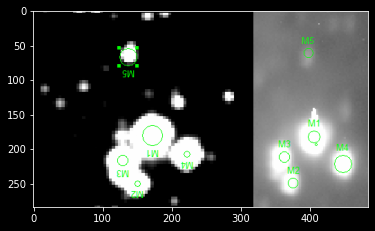

In [6]:
# Finder charts vs FITS images

# Q1 and Q4 finder chart stars ("horseshoe")
im = img.imread(fn_q1_q4)
plt.imshow(im, origin='upper')

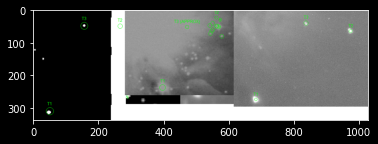

In [7]:
# Q2 finder chart stars ("triangle")
im = img.imread(fn_q2)
plt.imshow(im, origin='upper')

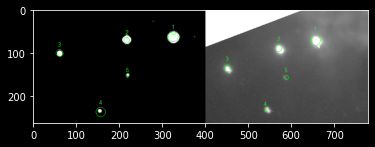

In [8]:
# Q3 finder chart stars (I dunno, an arrow, maybe?)
im = img.imread(fn_q3)
plt.imshow(im, origin='upper')

In [9]:
# Main stars used:
# Q1, Q4, Q2 (I): tet01 ori c
# Q2 (B and V): V* KS Ori
# Q3: tet02 Ori A

# COPY/PASTED SIMBAD COORDS OF MATCHED STARS FROM OUR IMAGES
# ARROW (Q3)
# 1: {083.8454321129830 -05.4160655533618 0.1994 0.2051 90 {* tet02 Ori A} SB* 0.006 1.380 2.2153 0.000063 6.30 6.39 O9.5IVp}
# 2: {083.8600078271642 -05.4168920419063 0.0645 0.0734 90 {* tet02 Ori B} YSO 1.467 0.077 2.4459 0.000095 6.29 6.38 B2-B5}
# 3: {083.8809696497211 -05.4212186958393 0.0397 0.0435 90 {* tet02 Ori C} Orion_V* 2.367 3.524 2.4229 0.000100 7.80 8.24 B4V}
# 4: {083.8684427811187 -05.4389912158238 0.0751 0.0669 90 {V* V1073 Ori} Orion_V* 0.184 0.909 2.5965 0.000080 9.64 9.52 B9.5V}
# 5: {083.8597962569978 -05.4278467998531 0.0581 0.0648 90 {V* AK Ori} Orion_V* 0.124 2.175 2.4376 0.000096 12.859 12.082 G5:}

# HORSESHOE (Q1 & Q4 & Q2I)
# 1: {083.8186161063084 -05.3896988630991 0.2664 0.2532 90 {* tet01 Ori C} ** 2.111 -0.588 2.7066 0.000082 5.15 5.13 O7Vp}
# 2: {083.8172302422873 -05.3852220643495 0.0454 0.0492 90 {* tet01 Ori B} EB* 1.459 1.030 2.4824 0.000087 8.20 7.96 B1V}
# 3: {083.8159444718486 -05.3873198195769 0.0657 0.0724 90 {* tet01 Ori A} Ae* 1.536 0.123 2.3731 0.000094 6.75 6.73 B0V}
# 4: {083.8219120301588 -05.3879405613796 0.0456 0.0521 90 {* tet01 Ori D} YSO 1.836 0.165 2.1166 0.000108 6.79 6.70 B1.5Vp}
# 5: {083.8164575426527 -05.3972134626181 0.3620 0.3490 90 {V* V2279 Ori} Orion_V* 2.796 -4.783 0.7897 0.000076 13.648 12.730 M0.5+M2}

# TRIANGLE (Q2B & Q2V)
# T1: {083.7909916121930 -05.4647868257898 0.0462 0.0452 90 {HD 36982} Orion_V* 1.482 1.610 2.4474 0.000127 8.58 8.46 B1.5Vp}
# T2: {083.7505457414543 -05.4211763792293 0.0434 0.0419 90 {V* KS Ori} Orion_V* 2.936 -2.707 2.6985 0.000067 10.34 10.19 A0V}
# T3: {083.7734900570550 -05.4220933749747 0.0373 0.0342 90 {V* LL Ori} Orion_V* 1.654 -0.334 2.5514 0.000097 12.309 11.517 K0-K3e}

In [10]:
# ARROW (Q3)
coords_stars_arrow = [083.8454321129830, -05.4160655533618], [083.8600078271642, -05.4168920419063], \
                     [083.8809696497211, -05.4212186958393], [083.8684427811187, -05.4389912158238], \
                     [083.8597962569978, -05.4278467998531]
B_mag_arrow = [6.30, 6.29, 7.80, 9.64, 12.859]
V_mag_arrow = [6.39, 6.38, 8.24, 9.52, 12.082]
I_mag_arrow = [6.35, 11.050, np.nan, 9.552, 10.527]

# HORSESHOE (Q1 & Q4 & Q2I)
coords_stars_horsehoe = [083.8186161063084, -05.3896988630991], [083.8172302422873, -05.3852220643495], \
                        [083.8159444718486, -05.3873198195769], [083.8219120301588, -05.3879405613796], \
                        [083.8164575426527, -05.3972134626181]

B_mag_horseshoe = [5.15, 8.20, 6.75, 6.79, 13.648]
V_mag_horseshoe = [5.13, 7.96, 6.73, 6.70, 12.730]
I_mag_horseshoe = [4.73, np.nan, 6.21, 6.20, 10.537]

# TRIANGLE (Q2B & Q2V)
coords_stars_triangle = [083.7909916121930, -05.4647868257898], [083.7505457414543, -05.4211763792293], \
                        [083.7734900570550, -05.4220933749747]

B_mag_triangle = [8.58, 10.34, 12.309]
V_mag_triangle = [8.46, 10.19, 11.517]
I_mag_triangle =[np.nan, np.nan, 10.034]

B_mags = B_mag_horseshoe + B_mag_arrow + B_mag_triangle
V_mags = V_mag_horseshoe + V_mag_arrow + V_mag_triangle
I_mags = I_mag_horseshoe + I_mag_arrow + I_mag_triangle

mag_list = B_mags, V_mags, I_mags

In [11]:
# Filter properties
B_ZP = 4023.81 * u.Jy
B_W_eff = 97.269 * u.nm
B_lam_center = 439.008 * u.nm

V_ZP = 3562.51 * u.Jy
V_W_eff = 88.965 * u.nm
V_lam_center = 550.142 * u.nm

I_ZP = 2282.72 * u.Jy
I_W_eff = 231.6 * u.nm
I_lam_center = 865.745 * u.nm

obs_area = (4.8387*(10**4) * u.mm**2).to(u.cm**2)
sky_area_pixels = (230*200) * u.pixel**2

In [12]:
# Coordinates of stars used for calculations (order BVI, HAT, 123(45))

V_coords = [560, 765], [494, 752], [508, 747], [504, 782], [np.nan, np.nan], \
           [640, 955], [630, 1042], [630, 1172], [750, 1120], [694, 1053],  \
           [955, 692], [762, 535], [785, 399]




sky_image_coords = [[105, 120], [984, 1286], [400, 650]]
    # In order of BVI

In [13]:
def magnitude(mag_star, zpv):
    return 10**(-mag_star/2.5) * zpv

# def photon_count(band_width, band_center, flux_jy, area):
#     nu = (constants.c / band_center).decompose()
#     del_nu = nu * band_width / band_center
#     del_nu = del_nu.decompose()
#
#     E_rec_tyc = (flux_jy).to(u.erg/u.s/u.cm**2/u.Hz) * area * del_nu.to(u.Hz)
#     E_ph = constants.h * nu
#
#     photons = (E_rec_tyc / E_ph).decompose()
#     print("\nPhotons per second:", photons)
#     # "Expected flux (ergs/s):", E_rec_tyc,
#     return photons

def calculate_star_flux_and_error(cutout_star, sky_stddev):

    mask = cutout_star > 2*sky_stddev
    masked_star_sum = cutout_star[mask].sum()
    masked_star_sum_error = (cutout_star[mask].sum() + sky_stddev**2*mask.sum())**0.5

    return masked_star_sum, masked_star_sum_error

In [14]:
# sky_stddev = pleiades_clear_darksub_flattened.std() # estimate of the per-pixel error

os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7')

m42_list = glob.glob('**/m42_mosaic_*.FITS')
m42_uncertainty_list = glob.glob('**/m42_mosaic_uncertainty_*.FITS')

In [15]:
i = 0

for current_file in m42_list:
    os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab7')

    file_data = fits.getdata(current_file)
    current_filter = fits.getheader(current_file)['FILTER']

    if current_filter.lower() == "photometric b":
        filter_num = 0
        current_band_width = B_W_eff
        current_band_center = B_lam_center
        current_zpv = B_ZP
    elif current_filter.lower() == "photometric v":
        filter_num = 1
        current_band_width = V_W_eff
        current_band_center = V_lam_center
        current_zpv = V_ZP
    elif current_filter.lower() == "photometric i":
        filter_num = 2
        current_band_width = I_W_eff
        current_band_center = I_lam_center
        current_zpv = I_ZP
    else:
        print("Something has gone horribly wrong.")

    current_mag_list = mag_list[filter_num]

    # sky_stddev = pleiades_clear_darksub_flattened.std() # estimate of the per-pixel error
    print(current_filter)

    current_coords = coords_stars_list[filter_num]
    current_sky_coords = sky_image_coords[quad-1]
    x_cen = current_sky_coords[0]
    y_cen = current_sky_coords[1]
    sky_mean = file_data[x_cen-100:x_cen+100, y_cen-115:y_cen+115].mean()
    sky_stddev = file_data[x_cen-100:x_cen+100, y_cen-115:y_cen+115].std() # estimate of the per-pixel error
    uncertainty_file = fits.getdata(m42_uncertainty_list[i])
    sky_uncertainty = uncertainty_file[x_cen-100:x_cen+100, y_cen-115:y_cen+115]
    sky_uncertainty = sky_uncertainty[np.logical_not(np.isnan(sky_uncertainty))]
    uncertainty_sky_sum = (sky_uncertainty**2).sum()
    size = len(sky_uncertainty)
    uncertainty_on_sky_mean = uncertainty_sky_sum / size

    print(f"The sky mean is {sky_mean:0.2f} +/- {uncertainty_on_sky_mean:0.2f}.  The SNR={sky_mean/uncertainty_on_sky_mean:0.2g}")
    print(f"Standard deviation of the data: {sky_stddev:0.1f}")
    print(f"Average of the per-pixel uncertainty from error propagation: {sky_uncertainty.mean():0.1f}")

    zeropoints = []
    inst_mags = []

    iter_int = 0
    for x in current_mag_list[filter_num]:
        current_coord_x, current_coord_y = current_coords[iter_int][0], current_coords[iter_int][1]
        if x is np.nan or current_coord_x is np.nan or current_coord_y is np.nan:
            iter_int += 1
            continue
        cutout_star = file_data[current_coord_x-20:current_coord_x+20, current_coord_y-20:current_coord_y+20]
        current_flux_jy = magnitude(x, current_zpv)
        current_count, current_error = calculate_star_flux_and_error(cutout_star, sky_stddev)
        inst_mag = -2.5*np.log10(current_count)
        zp = x - inst_mag
        zeropoints.append(zp)
        inst_mags.append(inst_mag)
        iter_int += 1

    avg_zp, std_zp = np.mean(zeropoints), np.std(zeropoints)
    print(f"Zero-point is estimated to be {avg_zp:0.1f}+/-{std_zp:0.1f}\n")

    i += 1




KeyError: "Keyword 'FILTER' not found."